In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/NAM 4/DATA W&M/BT/train_u6lujuX_CVtuZ9i.csv'
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install imbalanced-learn

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df["Dependents"].value_counts()
#checking value count because the column values are numeric type but showing object

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
df["Dependents"].replace('3+',3,inplace=True)

In [ ]:
df["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3,51


In [ ]:
df['Dependents']=df['Dependents'].astype('float')
df['Dependents'].dtype

dtype('float64')

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Xử lý giá trị null
Kiểm tra phần trăm giá trị null trong cột

In [ ]:
df.isnull().sum()/len(df)

,0
Loan_ID,0.000000
Gender,0.021173
Married,0.004886
Dependents,0.024430
Education,0.000000
Self_Employed,0.052117
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.035831
Loan_Amount_Term,0.022801


dữ liệu phân loại và liên tục. Vì vậy sẽ thay thế dữ liệu phân loại bằng cách sử dụng chế độ và dữ liệu liên tục bằng cách sử dụng trung bình.

In [ ]:
print("Gende",df["Gender"].mode())
print("Married",df["Married"].mode())
print("Dependents",df["Dependents"].mode())
print("Self_Employed",df["Self_Employed"].mode())
print("Loan_Term",df["Loan_Amount_Term"].mode())
print("Credit_History",df["Credit_History"].mode())

Gende 0    Male
Name: Gender, dtype: object
Married 0    Yes
Name: Married, dtype: object
Dependents 0    0.0
Name: Dependents, dtype: float64
Self_Employed 0    No
Name: Self_Employed, dtype: object
Loan_Term 0    360.0
Name: Loan_Amount_Term, dtype: float64
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [ ]:
df["Gender"].replace(np.nan,"Male",inplace=True)
df["Married"].replace(np.nan,"Yes",inplace=True)
df["Self_Employed"].replace(np.nan,"No",inplace=True)
df["Dependents"].replace(np.nan,0.0,inplace=True)
df["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)
df["Credit_History"].replace(np.nan,1.0,inplace=True)
kmean=df["LoanAmount"].mean()
df["LoanAmount"].fillna(kmean,inplace=True)
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#sns.pairplot(data=df,hue='Loan_Status')

<Axes: >

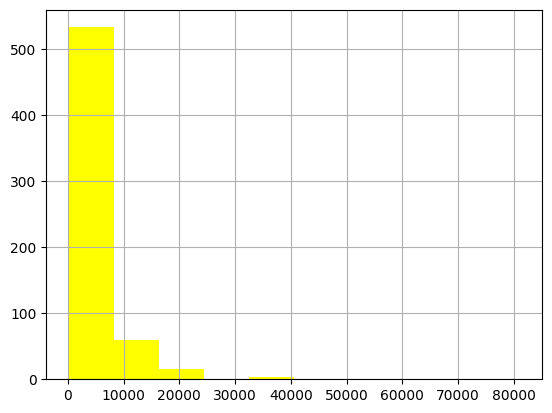

In [ ]:
df["ApplicantIncome"].hist(color="yellow")

<Axes: >

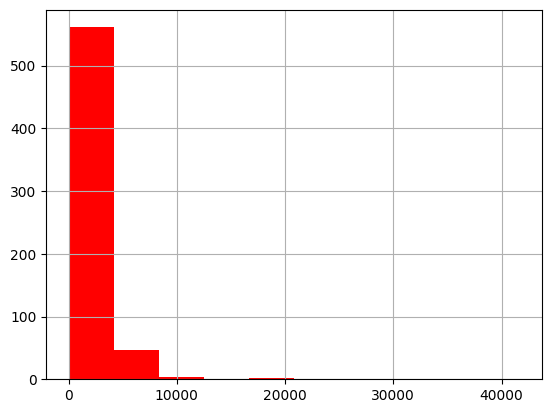

In [ ]:
df["CoapplicantIncome"].hist(color="red")

In [ ]:
#Tạo 1 cột mới là tổng thu nhập
df["TotalIncome"]=(df["ApplicantIncome"]+df["CoapplicantIncome"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [ ]:
df.drop(["ApplicantIncome"],axis=1,inplace=True)

In [ ]:
df.drop(["CoapplicantIncome"],axis=1,inplace=True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


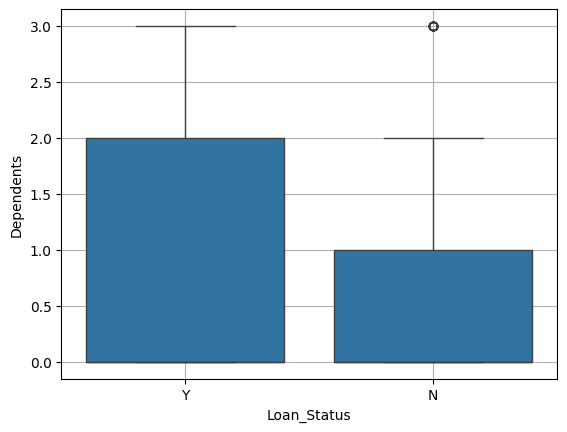

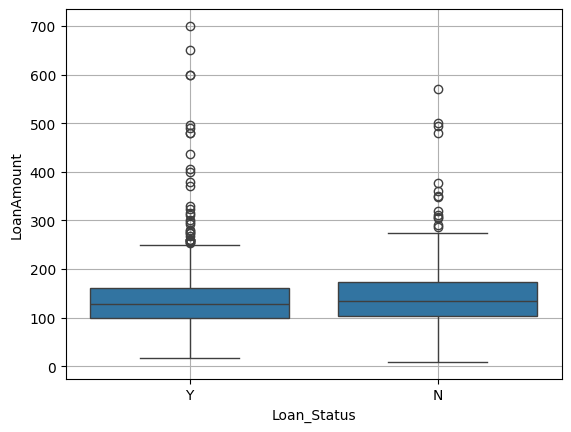

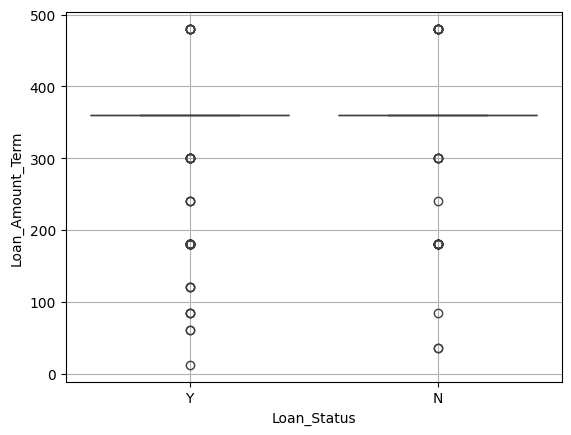

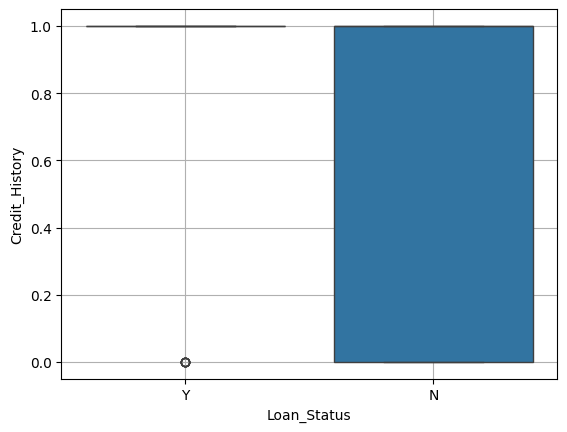

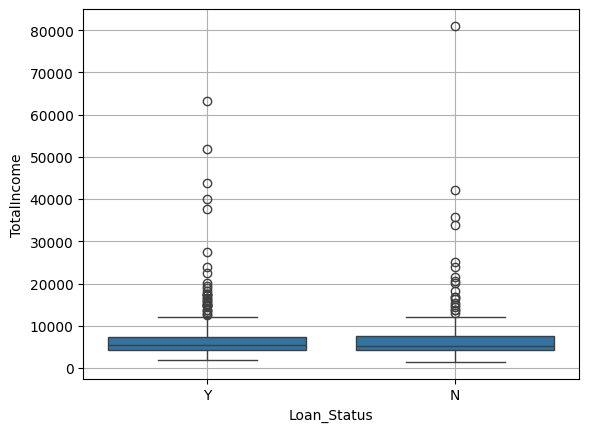

In [ ]:
col=df.select_dtypes("float64","int64").columns
for i in df[col]:
    sns.boxplot(data=df,x="Loan_Status",y=df[i])
    plt.grid()
    plt.show()

<Axes: ylabel='count'>

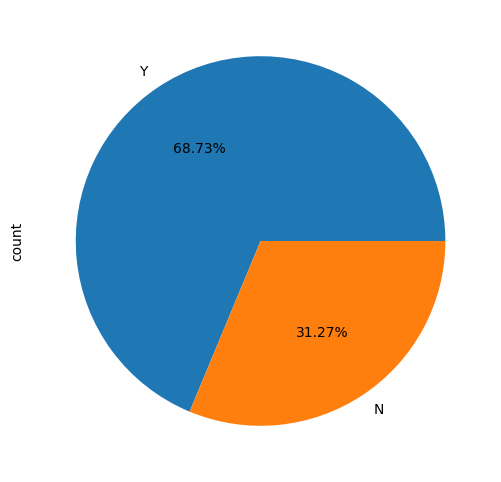

In [ ]:
df["Loan_Status"].value_counts().plot(figsize=(6,6),kind='pie',autopct="%.2f%%")

Nhận xét: có nhiều người vay tiền hơn

# Data Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=oe.fit_transform(df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.0,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,1.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,0.0,128.000000,360.0,1.0,0.0,0.0,6091.0
2,2.0,1.0,1.0,0.0,0.0,1.0,66.000000,360.0,1.0,2.0,1.0,3000.0
3,3.0,1.0,1.0,0.0,1.0,0.0,120.000000,360.0,1.0,2.0,1.0,4941.0
4,4.0,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,1.0,6000.0


<Axes: >

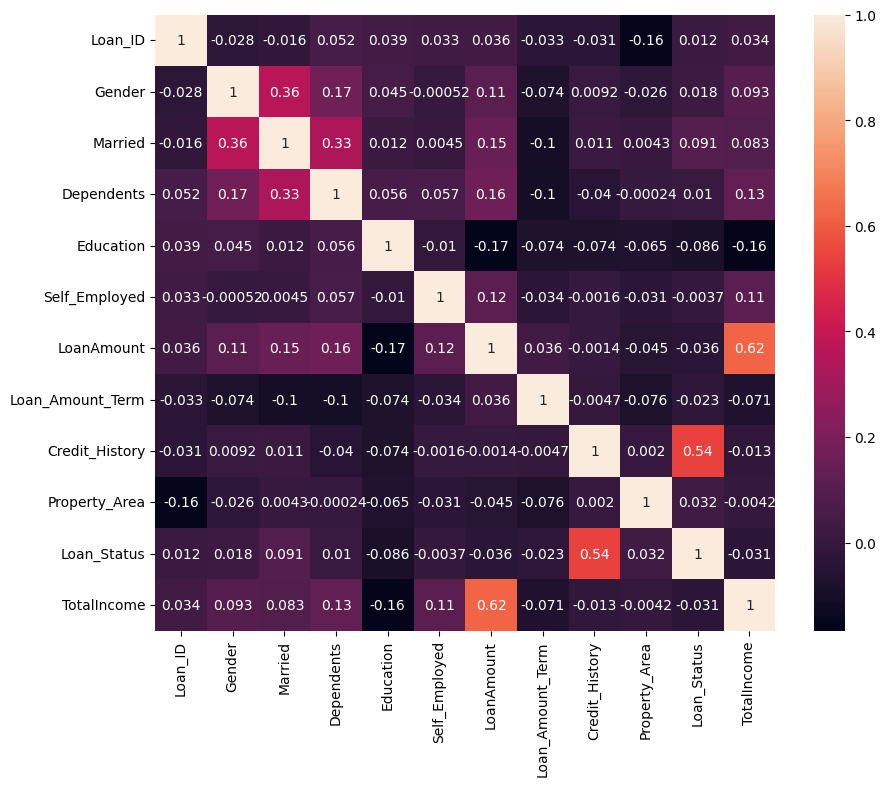

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Lịch sử tín dụng có mối tương quan nhiều hơn với cột mục tiêu. Giáo dục, Tự kinh doanh, Tổng thu nhập có mối tương quan tiêu cực.

# Trích chọn đặc trưng

In [ ]:
feature=df.drop("Loan_Status",axis=1)
feature.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0.0,1.0,0.0,0.0,0.0,0.0,146.412162,360.0,1.0,2.0,5849.0
1,1.0,1.0,1.0,1.0,0.0,0.0,128.000000,360.0,1.0,0.0,6091.0
2,2.0,1.0,1.0,0.0,0.0,1.0,66.000000,360.0,1.0,2.0,3000.0
3,3.0,1.0,1.0,0.0,1.0,0.0,120.000000,360.0,1.0,2.0,4941.0
4,4.0,1.0,0.0,0.0,0.0,0.0,141.000000,360.0,1.0,2.0,6000.0


In [ ]:
target=df.iloc[:,-2]
target.head()

,Loan_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


# CHIA TẬP DỮ LIỆU

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(429, 11)
(185, 11)
(429,)
(185,)


### Mô hình

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)

    print(f"Training score: {train}\nTesting score: {test}")
    print(f"\nAccuracy: ",accuracy_score(ytest,ypred))
    print(f"\nClassification report: \n",classification_report(ytest,ypred))


    return model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
knn=mymodel(KNeighborsClassifier())

Training score: 0.7342657342657343
Testing score: 0.6054054054054054

Accuracy:  0.6054054054054054

Classification report: 
               precision    recall  f1-score   support

         0.0       0.16      0.10      0.12        51
         1.0       0.70      0.80      0.75       134

    accuracy                           0.61       185
   macro avg       0.43      0.45      0.43       185
weighted avg       0.55      0.61      0.57       185



# Điều chỉnh tham số

In [ ]:
trainac=[]
testac=[]


for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)

    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)

    trainac.append(train)
    testac.append(test)

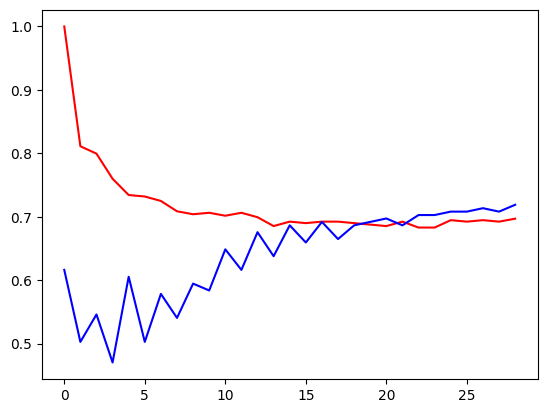

In [ ]:
plt.plot(trainac,color="red")
plt.plot(testac,color="blue")

### K=17

In [ ]:
knn=mymodel(KNeighborsClassifier(n_neighbors=17))
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

Training score: 0.6923076923076923
Testing score: 0.6918918918918919

Accuracy:  0.6918918918918919

Classification report: 
               precision    recall  f1-score   support

         0.0       0.20      0.04      0.07        51
         1.0       0.72      0.94      0.82       134

    accuracy                           0.69       185
   macro avg       0.46      0.49      0.44       185
weighted avg       0.58      0.69      0.61       185



Testing score and training score gần như bằng nhau sau khi điều chỉnh.

# LogisticRegression

In [ ]:
lr=mymodel(LogisticRegression())

Training score: 0.7995337995337995
Testing score: 0.827027027027027

Accuracy:  0.827027027027027

Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



Bị Underfitting

# Imblearn Random over sample

In [ ]:
df["Loan_Status"].value_counts()

,count
Loan_Status,
1.0,422
0.0,192


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

In [ ]:
x_label,y_label=ros.fit_resample(xtrain,ytrain)

In [ ]:
y_label.value_counts()

,count
Loan_Status,
0.0,288
1.0,288


now the number of Yes and No is equal.

In [ ]:
def mm(model):
    model.fit(x_label,y_label)
    ypred=model.predict(xtest)

    tr=model.score(x_label,y_label)
    te=model.score(xtest,ytest)

    print(f"Training score: {tr}\nTesting score: {te}")
    print(f"\nAccuracy score:",accuracy_score(ytest,ypred))

    print(f"\nClassification report: \n",classification_report(ytest,ypred))

    return model

In [ ]:
knn=mm(KNeighborsClassifier())

Training score: 0.7725694444444444
Testing score: 0.4702702702702703

Accuracy score: 0.4702702702702703

Classification report: 
               precision    recall  f1-score   support

         0.0       0.19      0.27      0.22        51
         1.0       0.66      0.54      0.60       134

    accuracy                           0.47       185
   macro avg       0.43      0.41      0.41       185
weighted avg       0.53      0.47      0.49       185



In [ ]:
trac=[]
teac=[]


for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_label,y_label)

    tr=knn.score(x_label,y_label)
    te=knn.score(xtest,ytest)

    trac.append(tr)
    teac.append(te)

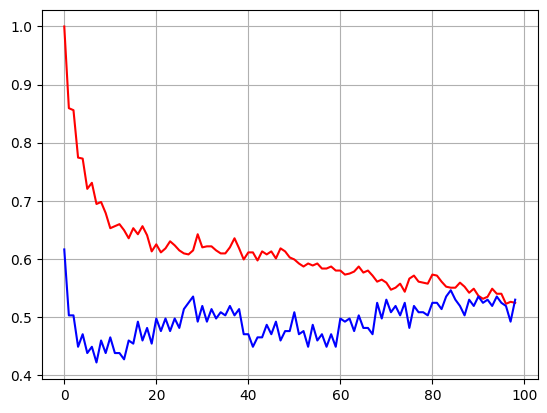

In [ ]:
plt.plot(trac,color="red")
plt.plot(teac,color="blue")
plt.grid()

k=97

In [ ]:
knns=mm(KNeighborsClassifier(n_neighbors=97))

Training score: 0.5225694444444444
Testing score: 0.518918918918919

Accuracy score: 0.518918918918919

Classification report: 
               precision    recall  f1-score   support

         0.0       0.22      0.29      0.25        51
         1.0       0.69      0.60      0.65       134

    accuracy                           0.52       185
   macro avg       0.46      0.45      0.45       185
weighted avg       0.56      0.52      0.54       185



Bây giờ độ chính xác của việc kiểm tra và đào tạo gần như giống nhau

In [ ]:
lr=mm(LogisticRegression())

Training score: 0.7083333333333334
Testing score: 0.7891891891891892

Accuracy score: 0.7891891891891892

Classification report: 
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.62        51
         1.0       0.86      0.85      0.85       134

    accuracy                           0.79       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.79      0.79      0.79       185



Bị underfitting

## Standard Scaler after imblearn

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-1.157236e-17,0.273231,0.411733,1.223298,0.674519,5849.0
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,-2.192733e-01,0.273231,0.411733,-1.318513,-1.482537,6091.0
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-9.576410e-01,0.273231,0.411733,1.223298,0.674519,3000.0
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-3.145466e-01,0.273231,0.411733,1.223298,0.674519,4941.0
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-6.445428e-02,0.273231,0.411733,1.223298,0.674519,6000.0


In [ ]:
lr=mm(LogisticRegression())

Training score: 0.7083333333333334
Testing score: 0.7891891891891892

Accuracy score: 0.7891891891891892

Classification report: 
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.62        51
         1.0       0.86      0.85      0.85       134

    accuracy                           0.79       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.79      0.79      0.79       185



In [ ]:
knn=mm(KNeighborsClassifier())

Training score: 0.7725694444444444
Testing score: 0.4702702702702703

Accuracy score: 0.4702702702702703

Classification report: 
               precision    recall  f1-score   support

         0.0       0.19      0.27      0.22        51
         1.0       0.66      0.54      0.60       134

    accuracy                           0.47       185
   macro avg       0.43      0.41      0.41       185
weighted avg       0.53      0.47      0.49       185



In [ ]:
trac=[]
teac=[]


for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_label,y_label)

    tr=knn.score(x_label,y_label)
    te=knn.score(xtest,ytest)

    trac.append(tr)
    teac.append(te)

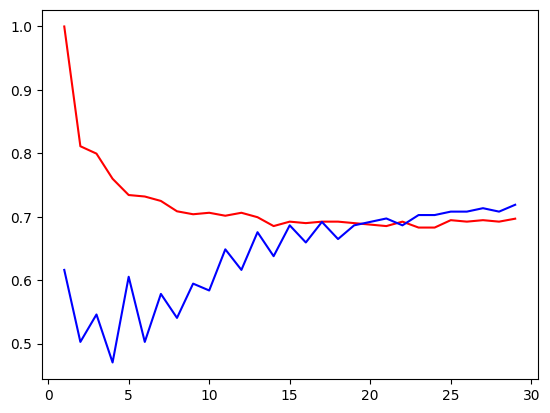

In [ ]:
plt.plot(range(1,30),trainac,color="red")
plt.plot(range(1,30),testac,color="blue")

In [ ]:
knss=mm(KNeighborsClassifier(n_neighbors=15))

Training score: 0.6354166666666666
Testing score: 0.4594594594594595

Accuracy score: 0.4594594594594595

Classification report: 
               precision    recall  f1-score   support

         0.0       0.17      0.25      0.21        51
         1.0       0.65      0.54      0.59       134

    accuracy                           0.46       185
   macro avg       0.41      0.40      0.40       185
weighted avg       0.52      0.46      0.48       185



In [ ]:
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

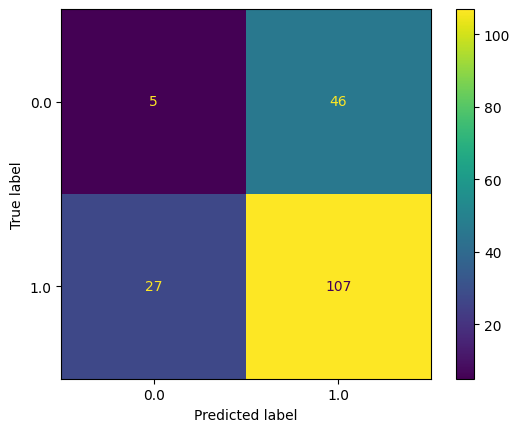

In [ ]:
# Huấn luyện lại mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

# Tính toán ma trận nhầm lẫn
knn_cm = confusion_matrix(ytest, knn.predict(xtest))

# Vẽ ma trận nhầm lẫn
ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=[0.0, 1.0]).plot()
plt.show()

In [ ]:
def mm(model):
    model.fit(x_label,y_label)
    ypred=model.predict(xtest)

    tr=model.score(x_label,y_label)
    te=model.score(xtest,ytest)

    print(f"Training score: {tr}\nTesting score: {te}")
    print(f"\nAccuracy score:",accuracy_score(ytest,ypred))

    print(f"\nClassification report: \n",classification_report(ytest,ypred))

    return model

In [ ]:
knn=mymodel(KNeighborsClassifier())

Training score: 0.7342657342657343
Testing score: 0.6054054054054054

Accuracy:  0.6054054054054054

Classification report: 
               precision    recall  f1-score   support

         0.0       0.16      0.10      0.12        51
         1.0       0.70      0.80      0.75       134

    accuracy                           0.61       185
   macro avg       0.43      0.45      0.43       185
weighted avg       0.55      0.61      0.57       185

